## Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [231]:
#import all the required libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [111]:
# import dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [112]:
# check column names
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [113]:
# replacing the whitespace with underscore for convinience
df.columns = df.columns.str.replace(' ', '_')
df.head(1)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


In [114]:
# check number of columns and rows
df.shape

(4177, 9)

In [115]:
# to find duplicate values
df.duplicated().sum()

0

In [116]:
#to convert catagorical values into numbers
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [117]:
# to understand dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


In [118]:
#to check for null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [119]:
df.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### visualization

[Text(0.5, 1.0, 'HISTOGRAM OF NO OF RINGS'),
 Text(0.5, 0, 'Rings'),
 Text(0, 0.5, 'count')]

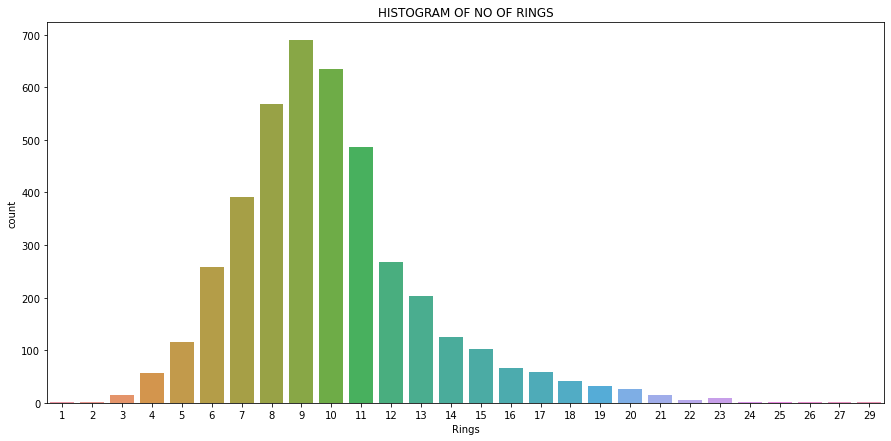

In [120]:
plt.figure(figsize = (15,7))
plt = sns.countplot(x='Rings',data=df)
plt.set(title='HISTOGRAM OF NO OF RINGS',xlabel='Rings',ylabel='count')

most of the rings are concentrated between 7 to 11.

the data is right skewed.

In [121]:
# to understand the ring catagories
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

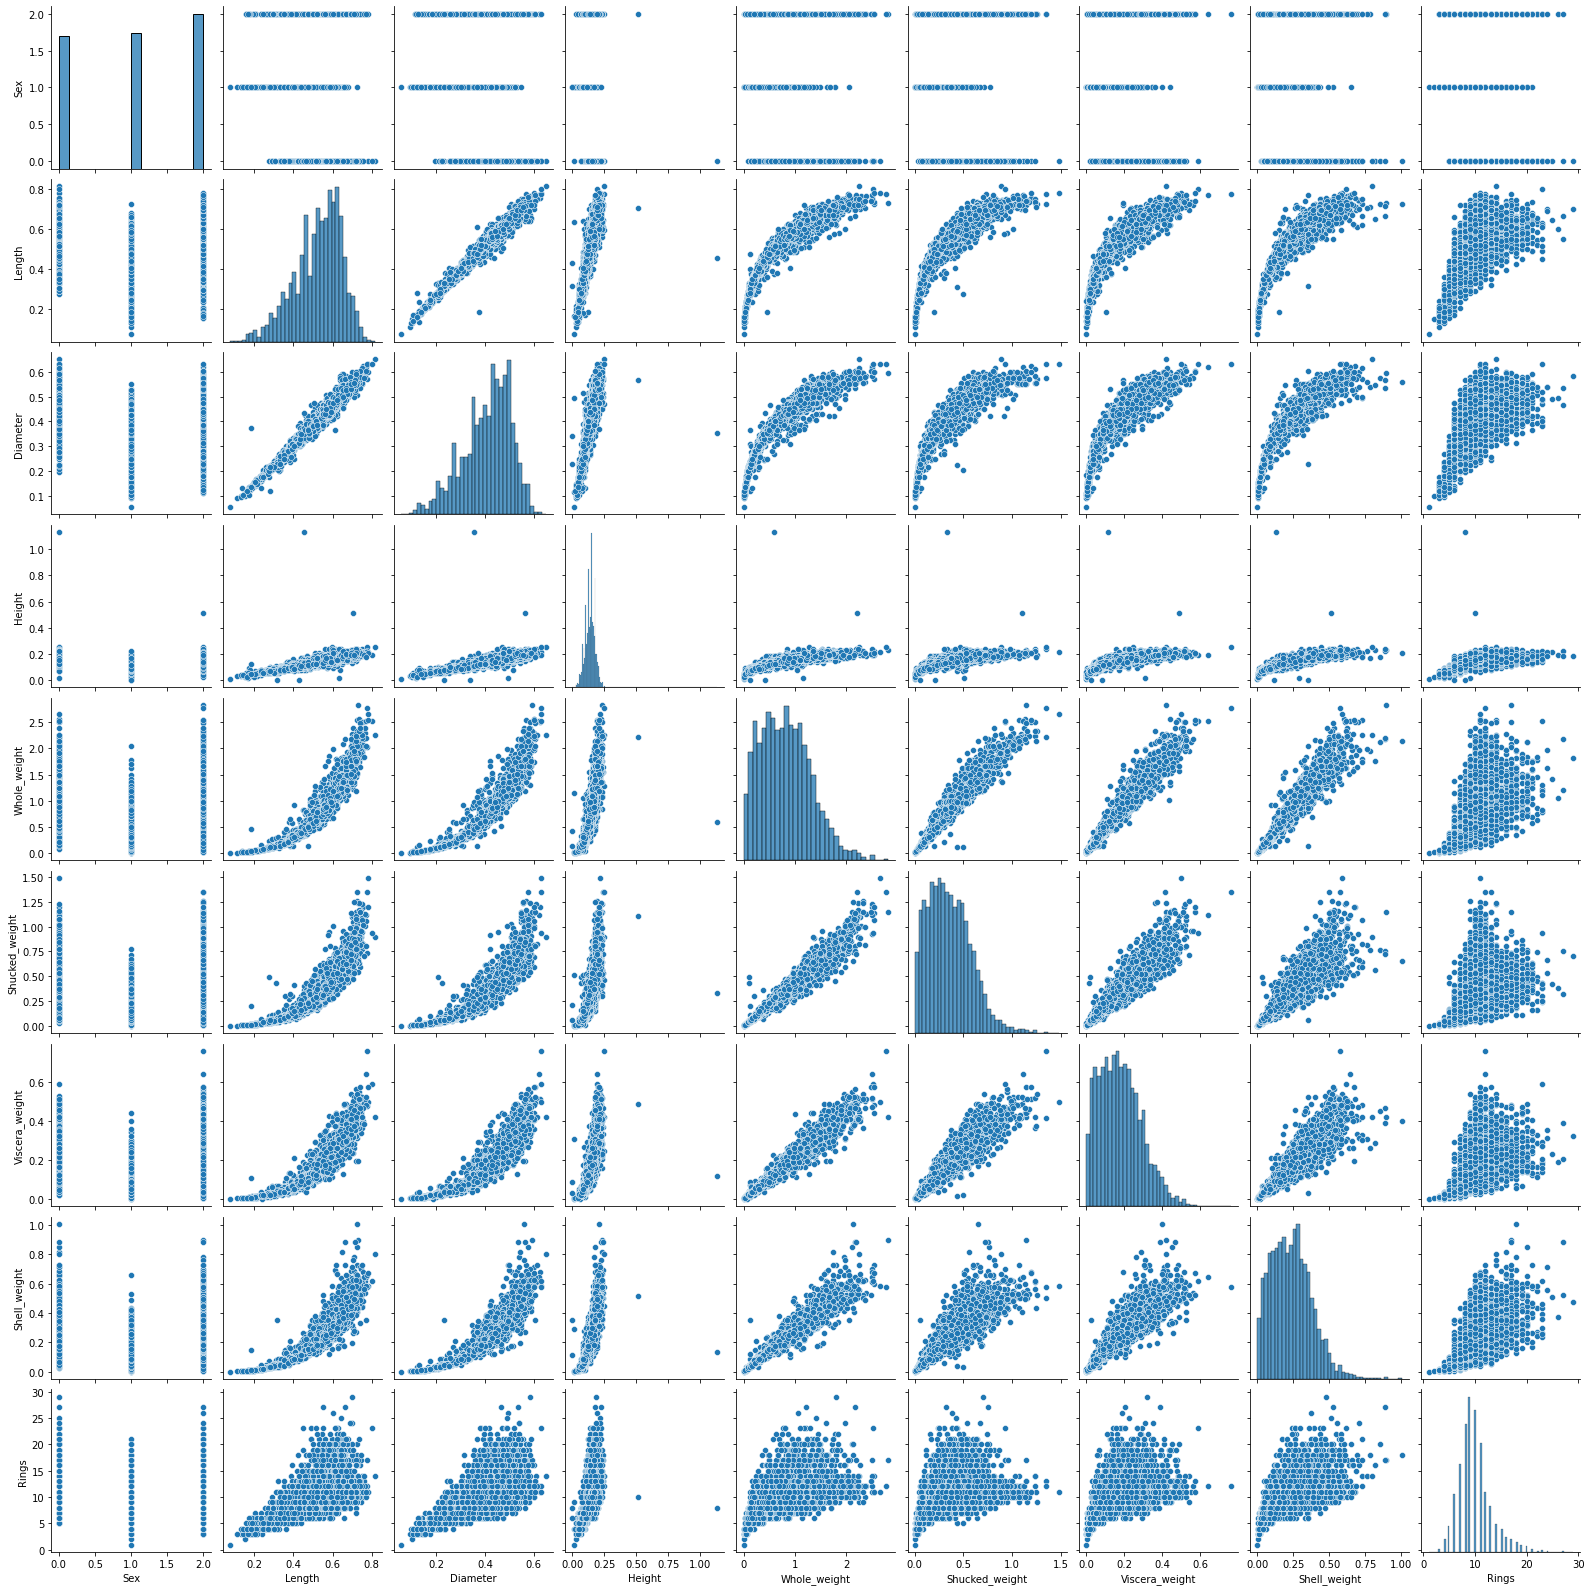

In [122]:
sns.pairplot(df)

rings column is highly corelated to length and diameter.

In [123]:
df.corr()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

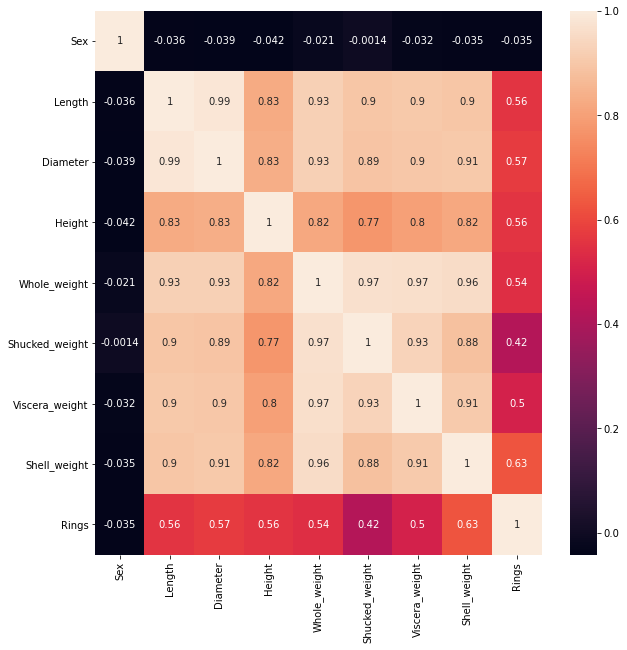

In [126]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),color ='k',annot=True)

1. complete dataset is posivitely corelated to each other attribute.
2. shell weight is highly corelated to rings among all other attributes.
3. sex has no impact on number of rings.

In [149]:
#to check the skewness in the dataset
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole_weight      0.530959
Shucked_weight    0.719098
Viscera_weight    0.591852
Shell_weight      0.620927
Rings             1.114102
dtype: float64

In [150]:
#to remove the skewness in the dataset
from sklearn.preprocessing import power_transform
df_new = power_transform(df)

In [152]:
#creating new dataset after removing skewness and saving it to 'df'
df = pd.DataFrame(df_new , columns = df.columns)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1.127072,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,1.482358
1,1.127072,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,-0.949135
2,-1.307935,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,-0.176075
3,1.127072,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,0.156908
4,-0.009459,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,-0.949135
...,...,...,...,...,...,...,...,...,...
4172,-1.307935,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,0.462368
4173,1.127072,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,0.156908
4174,1.127072,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,-0.176075
4175,-1.307935,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,0.156908


In [153]:
#to check if skweness is lying between -0.5 to 0.5
df.skew()[np.abs(df.skew()) < 0.5].all()

True

Sex                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Length            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Height               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Whole_weight      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Shucked_weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Viscera_weight          AxesSubplot(0.125,0.125;0.227941x0.222059)
Shell_weight         AxesSubplot(0.398529,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

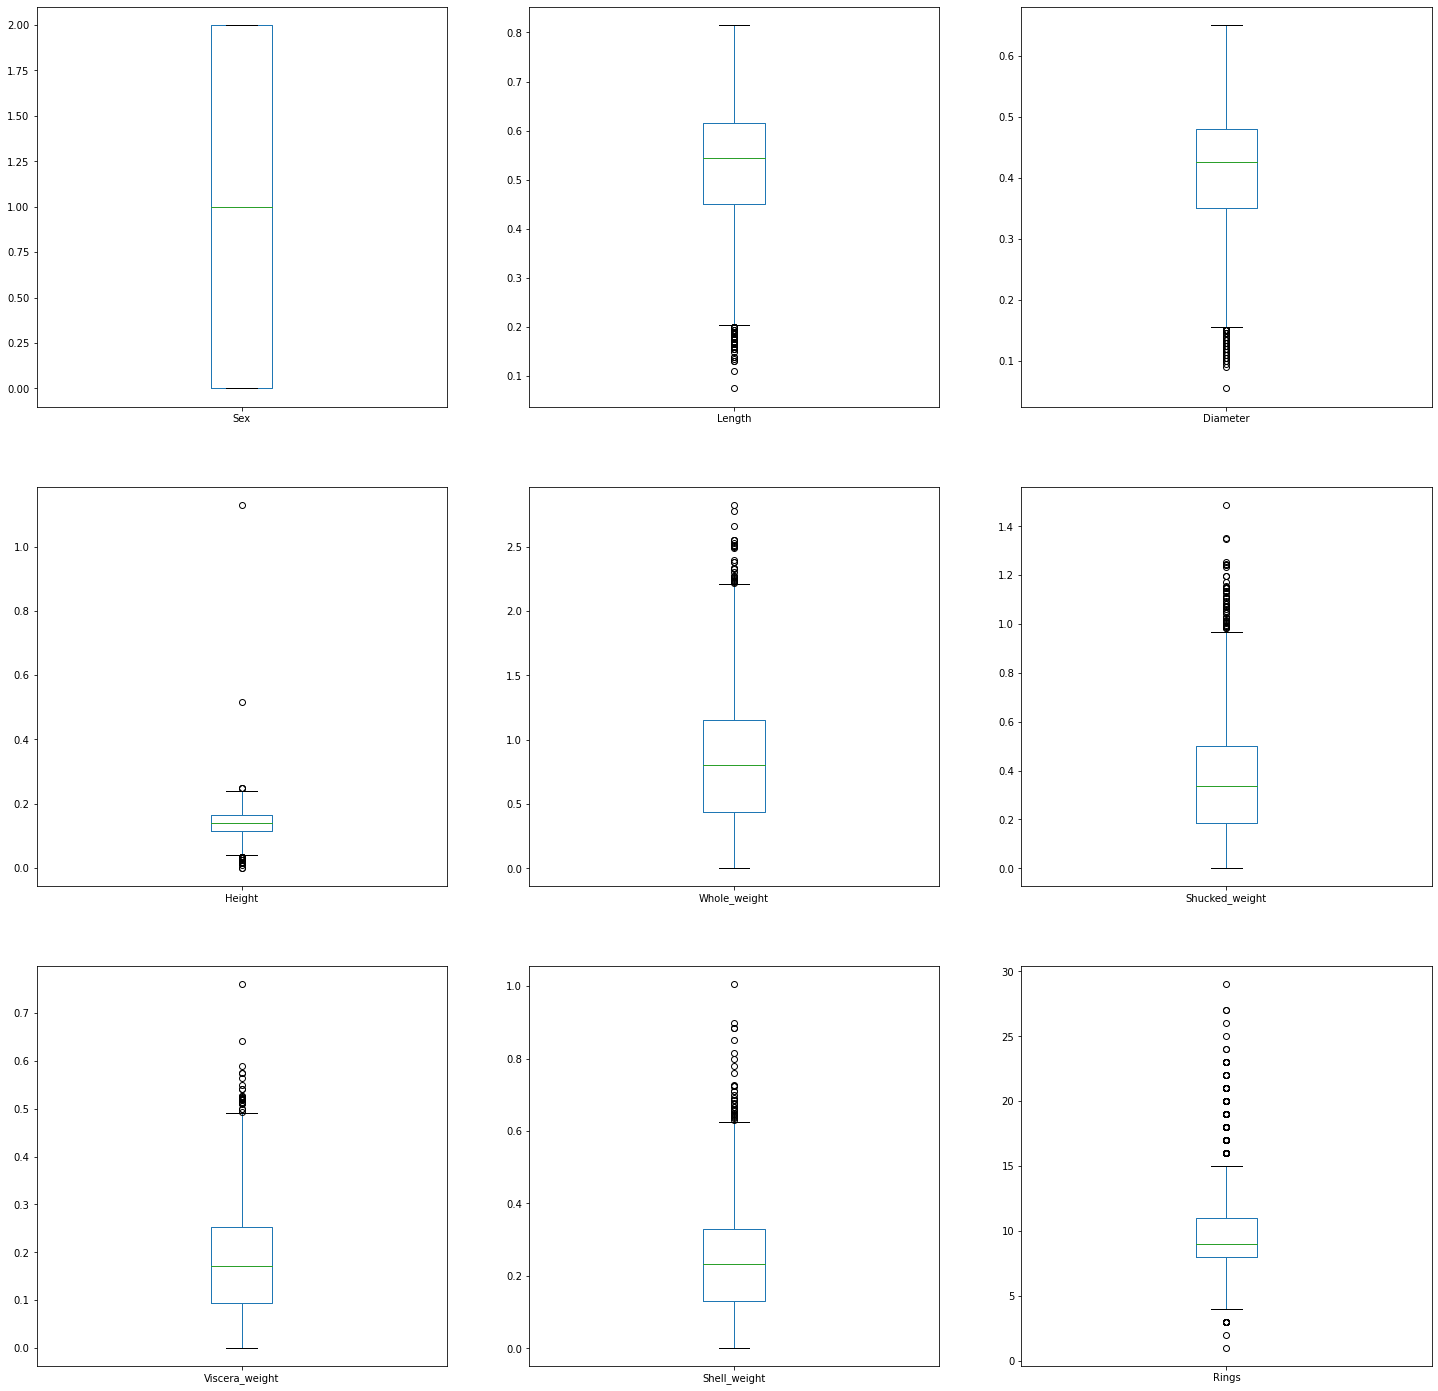

In [138]:
# to find out outliers in the dataset
df.plot(kind='box',subplots=True, layout=(3,3),figsize=(25,25))

In [164]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore(df)) < 3).all()

False

In [165]:
#to remove outliers in data set through zscore
z = np.abs(zscore(df))
z.shape

(4177, 9)

In [166]:
threshold = 3
print(np.where(z>3))

(array([ 163,  166,  236,  236,  237,  237,  238,  238,  294,  306,  306,
        480,  520,  526,  694,  719,  719,  720,  720,  891,  894, 1054,
       1174, 1209, 1257, 1417, 1428, 1428, 1429, 1763, 1987, 2051, 2108,
       2108, 2115, 2161, 2169, 2171, 2172, 2201, 2209, 2334, 2371, 2381,
       2711, 2711, 3149, 3190, 3280, 3472, 3521, 3801, 3902, 3996],
      dtype=int64), array([7, 7, 3, 8, 3, 8, 3, 8, 8, 3, 8, 8, 8, 8, 3, 3, 8, 3, 8, 7, 8, 8,
       3, 5, 3, 3, 1, 2, 8, 6, 3, 3, 7, 8, 8, 7, 3, 3, 3, 8, 8, 1, 8, 3,
       3, 8, 8, 3, 8, 8, 8, 8, 3, 3], dtype=int64))


In [173]:
df1 = df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(4177, 9)
(4132, 9)


In [174]:
#to find % loss in data
loss = (4177-4132)/4177 * 100
print(loss)

1.0773282259995212


Sex                  AxesSubplot(0.125,0.125;0.0731132x0.755)
Length            AxesSubplot(0.212736,0.125;0.0731132x0.755)
Diameter          AxesSubplot(0.300472,0.125;0.0731132x0.755)
Height            AxesSubplot(0.388208,0.125;0.0731132x0.755)
Whole_weight      AxesSubplot(0.475943,0.125;0.0731132x0.755)
Shucked_weight    AxesSubplot(0.563679,0.125;0.0731132x0.755)
Viscera_weight    AxesSubplot(0.651415,0.125;0.0731132x0.755)
Shell_weight      AxesSubplot(0.739151,0.125;0.0731132x0.755)
Rings             AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

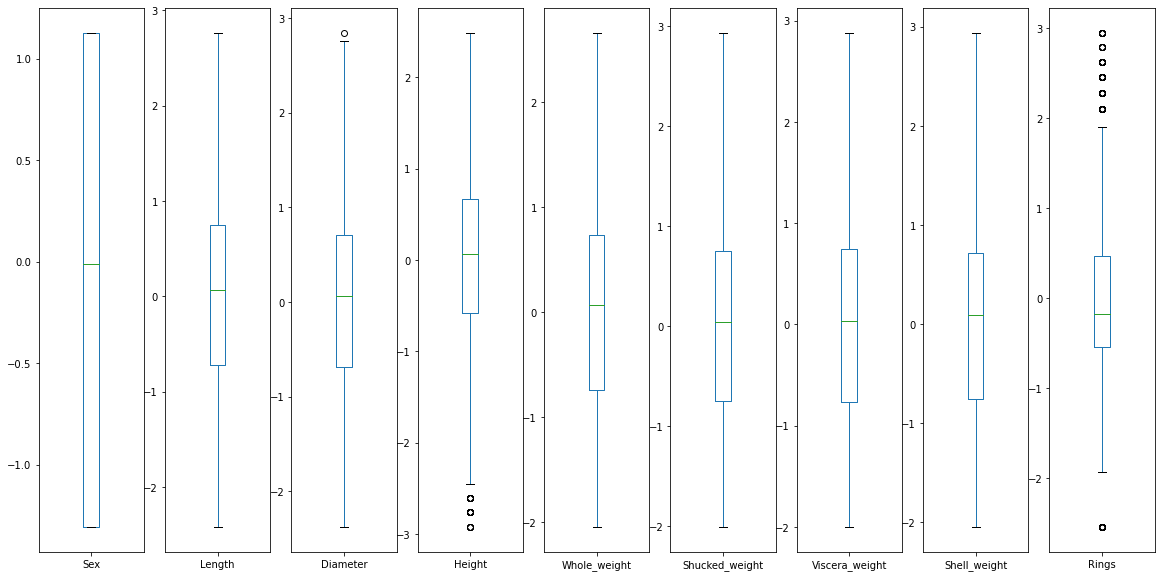

In [175]:
# visualization for outliers after using zscore
df1.plot(kind='box',subplots=True,figsize=(20,10))

In [177]:
#seperate feature variable and target variable
x = df1.drop (['Rings'], axis = 1)
y = df1['Rings']

In [178]:
x.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')

In [179]:
y

0       1.482358
1      -0.949135
2      -0.176075
3       0.156908
4      -0.949135
          ...   
4172    0.462368
4173    0.156908
4174   -0.176075
4175    0.156908
4176    0.744607
Name: Rings, Length: 4132, dtype: float64

In [180]:
#to convert y in to integer
le = LabelEncoder()
y=le.fit_transform(y)
y

array([11,  3,  5, ...,  5,  6,  8], dtype=int64)

### Model making

In [212]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,4132):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    KNN = KNeighborsClassifier()
    KNN.fit(x_train,y_train)
    predrf = KNN.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)
    

Best accuracy is 0.27327690447400244 on Random_State 14


In [213]:
#spliting dataset into training(80%) and testing(20%)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=14)

In [214]:
# to check shape after spliting
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (3305, 8)
shape of y_train: (3305, 8)
shape of x_test: (827, 8)
shape of y_test: (827,)


#### KNeighborsClassifier

In [215]:
#build a logistic regression classifier
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 32.889963724304714
[[ 7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3 10  7  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  9 16 29 10  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  7 30 28  9  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 18 48 29  8  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 11 11 76 25 16  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  8 40 49 20  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  5 23 30 28  2  3  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  2  2 12  6 16  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  5 12 12  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 10  5  1  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  5  3  4  2  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  4  5  0  2  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  1  0  1  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  2  5  1  2  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  3  

### GaussianNB

In [216]:
#build a RandomForestClassifier
GNB = GaussianNB()
RF.fit(x_train, y_train)
predlr = RF.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 27.08585247883918
[[ 8  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  6  7  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  9 16 28 10  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 12 32 17 11  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  6 20 43 26  9  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  2  7 28 43 42 15  3  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 16 37 37 16  7  7  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  6 20 31 26  4  4  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  1  6 15  9  5  2  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  6 11 11  4  0  0  1  1  0  0  1  0  0  0  0]
 [ 0  0  0  0  3  8  3  3  0  0  1  2  1  0  0  1  0  0  0  0]
 [ 0  0  0  0  2  3  4  5  0  1  2  2  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  3  5  1  1  0  0  3  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  2  0  0  1  0  0  2  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  6  1  1  0  0  0  3  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  2  2

### Decision Tree Model

In [217]:
# build a DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=2)
DT.fit(x_train, y_train)
predlr = DT.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 25.03022974607013
[[ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 16  0 48  0  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0 56  0 16  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 43  0 54 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 21  0 55 66  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0 37 79  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0 19 70  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  9 30  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  9 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  4 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  4  0  0

### Standard Vector Machine Model

In [218]:
#build a SVC model
svc=SVC(kernel = 'linear', C = 1)
svc.fit(x_train,y_train)
predlr = svc.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 29.866989117291414
[[ 7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5 12  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2 18  0 39  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0 40 24  8  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0 24 51 24  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0 12 17 68 44  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 12 38 69  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  4 23 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3 12 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  5 29  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  5 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1 12  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1 12  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  5  0  

In [219]:
#cross validation to check the accuracy score
print('cross validation score of KNeighborsClassifier model = ', cross_val_score(KNN,x,y,cv=None).mean())
print('cross validation score of GaussianNB model = ', cross_val_score(GNB,x,y,cv=None).mean())
print('cross validation score of desicion tree model = ', cross_val_score(DT,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())

cross validation score of KNeighborsClassifier model =  0.2248323090841485
cross validation score of GaussianNB model =  0.2374277926283337
cross validation score of desicion tree model =  0.24734109986502748
cross validation score of standard vector machine model =  0.262346765197584


### Hyper parameter tuning

In [220]:
#parameters of standard vector machine
parameter= param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [222]:
gcv = GridSearchCV(SVC(random_state=70), parameter, verbose=1, cv=10, n_jobs=-1)

In [223]:
#training the model
gcv.fit(x_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=SVC(random_state=70), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [224]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [225]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [226]:
# finding best estimator
gcv.best_estimator_

SVC(C=10, gamma=0.1, random_state=70)

In [234]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc1 =accuracy_score(y_test,pred)
print(acc*100)

28.657799274486095


In [235]:
# saving the model
import joblib
joblib.dump(acc1,'FinalModel_ablone.pkl')

['FinalModel_ablone.pkl']